<a href="https://colab.research.google.com/github/freddy-7/TI3002C/blob/main/7_Regresi%C3%B3n_Lineal_M%C3%BAltiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Carga rachivo csv
df=pd.read_csv("venecia_bueno_sin_nulos22.csv")
df.head(5)

,Unnamed: 0,id,host_id,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,property_type,room_type,...,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_total_listings_count.1,price
0,0,2.246641e+07,164674166,100.0,0,1,3,0,Entire rental unit,Entire home/apt,...,4.86,4.56,0,1,1,0,0,0.43,3,$290.00
1,1,7.060000e+17,48092742,100.0,0,46,77,0,Entire condo,Entire home/apt,...,4.93,4.79,0,46,24,22,0,0.43,77,$390.00
2,2,7.360000e+17,48092742,100.0,0,46,77,0,Private room in condo,Private room,...,4.93,4.79,0,46,24,22,0,0.43,77,$420.00
3,3,1.210000e+18,12355491,100.0,1,6,6,1,Private room in rental unit,Private room,...,4.93,4.79,1,6,0,4,0,3.31,6,$167.00
4,4,1.210000e+18,311957953,100.0,1,12,18,1,Entire rental unit,Entire home/apt,...,5.00,5.00,1,12,12,0,0,1.05,18,$289.00


In [4]:
df['price'] = df['price'].astype(str).str.replace('[\$,]', '', regex=True).astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\HP\AppData\Local\Temp\ipykernel_15016\271462396.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].astype(str).str.replace('[\$,]', '', regex=True).astype(float)


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8163 entries, 0 to 8162
Data columns (total 45 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    8163 non-null   int64  
 1   id                                            8163 non-null   float64
 2   host_id                                       8163 non-null   int64  
 3   host_acceptance_rate                          8163 non-null   float64
 4   host_is_superhost                             8163 non-null   int64  
 5   host_listings_count                           8163 non-null   int64  
 6   host_total_listings_count                     8163 non-null   int64  
 7   host_identity_verified                        8163 non-null   int64  
 8   property_type                                 8163 non-null   object 
 9   room_type                                     8163 non-null   o

In [5]:
#eliminamos la columna tipo string
df=df.drop(["property_type"],axis=1)
df=df.drop(["calendar_last_scraped"],axis=1)
df=df.drop(["room_type"],axis=1)

host_acceptance_rate

In [109]:
correlaciones = df.corr()
# Seleccionar solo las correlaciones de 'bedrooms'
correlaciones_bedrooms = correlaciones['host_acceptance_rate'].sort_values(ascending=False)
# Mostrar las 5 variables más correlacionadas con 'bedrooms'
print(correlaciones_bedrooms.head(6))  

host_acceptance_rate     1.000000
instant_bookable         0.363637
host_is_superhost        0.197798
number_of_reviews_ltm    0.186747
reviews_per_month        0.149574
number_of_reviews        0.144928
Name: host_acceptance_rate, dtype: float64


In [110]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['instant_bookable', 'host_is_superhost','number_of_reviews_ltm']]
Var_Dep= df['host_acceptance_rate']

In [6]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [7]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

In [114]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable', 'host_is_superhost', 'number_of_reviews_ltm'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([13.15900567,  5.98909995,  0.07403352]),
 'rank_': 3,
 'singular_': array([2467.84181042,   44.05527637,   41.88179472]),
 'intercept_': 81.62737313211045}

**Modelo matemático: y= 0.62534291x1 + 0.01978015x2 + 0.81582765x3 + 1.2098448339476615**

In [115]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.18531346094553125

In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=df[['instant_bookable', 'host_is_superhost']])
y_pred

array([81.62737313, 81.62737313, 81.62737313, ..., 94.7863788 ,
       94.7863788 , 81.62737313])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones', y_pred)
df

<Axes: xlabel='instant_bookable', ylabel='host_acceptance_rate'>

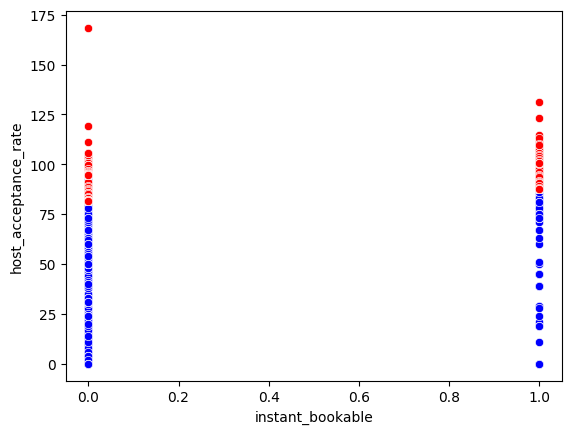

In [129]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='instant_bookable', y='host_acceptance_rate', color="blue", data=df)
sns.scatterplot(x='host_is_superhost', y='Predicciones', color="red", data=df)
#sns.lineplot(x='number_of_reviews_ltm', y='Predicciones', color="red", data=df)

In [119]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.18531346094553125

In [120]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.4304805000758237

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8163 entries, 0 to 8162
Data columns (total 43 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Predicciones                                  8163 non-null   float64
 1   Unnamed: 0                                    8163 non-null   int64  
 2   id                                            8163 non-null   float64
 3   host_id                                       8163 non-null   int64  
 4   host_acceptance_rate                          8163 non-null   float64
 5   host_is_superhost                             8163 non-null   int64  
 6   host_listings_count                           8163 non-null   int64  
 7   host_total_listings_count                     8163 non-null   int64  
 8   host_identity_verified                        8163 non-null   int64  
 9   accommodates                                  8163 non-null   i

In [ ]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=df.corr()
Corr_Factors

<Axes: >

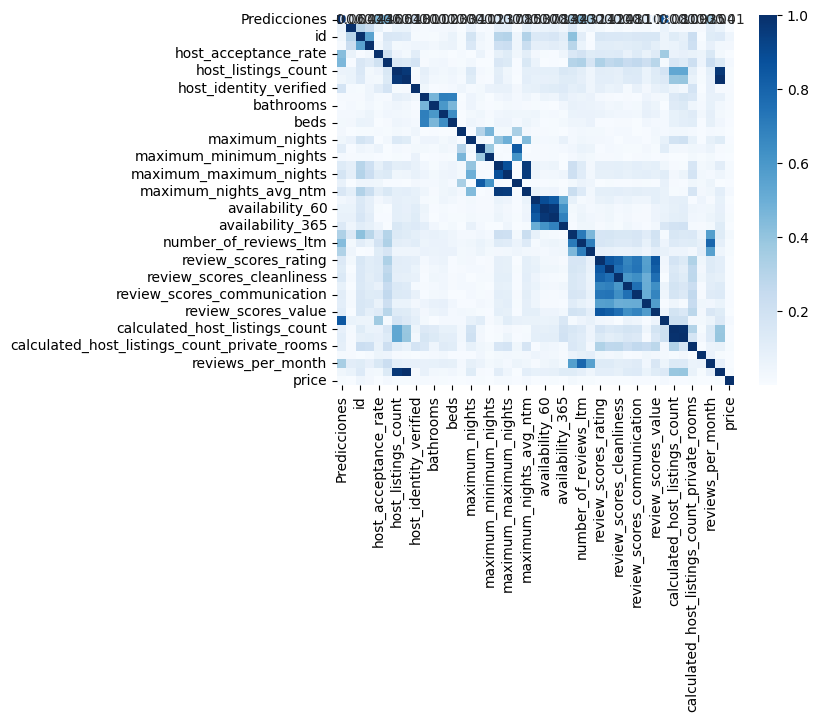

In [123]:
#Encontramos todas las correlaciones entre las variab
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1
#Graficamos el mapa de calor de los coeficientes de correlacion
Heat_Map=sns.heatmap(Corr_Factors1, cmap='Blues', annot=True, fmt=".2f")
Heat_Map

host_is_superhost

In [185]:
correlaciones = df.corr()
# Seleccionar solo las correlaciones de 'bedrooms'
correlaciones_bedrooms = correlaciones['host_is_superhost'].sort_values(ascending=False)
# Mostrar las 5 variables más correlacionadas con 'bedrooms'
print(correlaciones_bedrooms.head(9))  

host_is_superhost            1.000000
Predicciones6                0.602804
Predicciones                 0.459482
review_scores_rating         0.325701
Predicciones1                0.323907
number_of_reviews_ltm        0.322243
number_of_reviews            0.303812
review_scores_value          0.290937
review_scores_cleanliness    0.287359
Name: host_is_superhost, dtype: float64


In [186]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['review_scores_rating', 'number_of_reviews_ltm','number_of_reviews']]
Var_Dep= df['host_is_superhost']

In [187]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_rating', 'number_of_reviews_ltm',
        'number_of_reviews'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.35442258, 0.00342086, 0.00045728]),
 'rank_': 3,
 'singular_': array([12137.74458463,  1700.21479415,    34.05756812]),
 'intercept_': -1.363750139549427}

In [126]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.10491582205665462

In [188]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=df[['review_scores_rating', 'number_of_reviews_ltm', 'number_of_reviews']])
y_pred


array([0.30786552, 0.38355319, 0.38355319, ..., 0.40836277, 0.40836277,
       0.40836277])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones1', y_pred)
df

<Axes: xlabel='review_scores_rating', ylabel='host_is_superhost'>

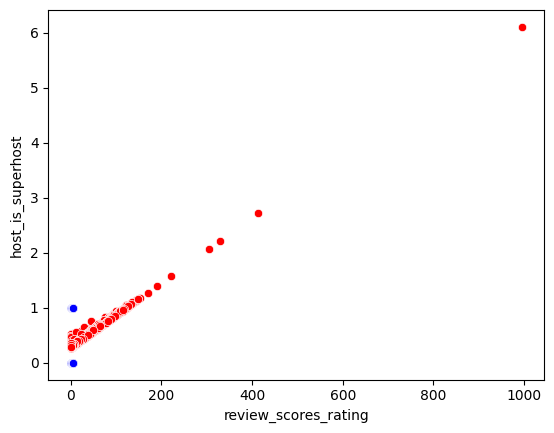

In [192]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='review_scores_rating', y='host_is_superhost', color="blue", data=df)
sns.scatterplot(x='number_of_reviews_ltm', y='Predicciones1', color="red", data=df)
#sns.lineplot(x='number_of_reviews', y='Predicciones1', color="pink", data=df)

In [193]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.18808261014102412

In [194]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.43368492035234996

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8163 entries, 0 to 8162
Data columns (total 45 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    8163 non-null   int64  
 1   id                                            8163 non-null   float64
 2   host_id                                       8163 non-null   int64  
 3   host_acceptance_rate                          8163 non-null   float64
 4   host_is_superhost                             8163 non-null   int64  
 5   host_listings_count                           8163 non-null   int64  
 6   host_total_listings_count                     8163 non-null   int64  
 7   host_identity_verified                        8163 non-null   int64  
 8   property_type                                 8163 non-null   object 
 9   room_type                                     8163 non-null   o

host_total_listings_count

In [134]:
correlaciones = df.corr()
# Seleccionar solo las correlaciones de 'bedrooms'
correlaciones_bedrooms = correlaciones['host_total_listings_count'].sort_values(ascending=False)
# Mostrar las 5 variables más correlacionadas con 'bedrooms'
print(correlaciones_bedrooms.head(6))  

host_total_listings_count.1                    1.000000
host_total_listings_count                      1.000000
host_listings_count                            0.966208
calculated_host_listings_count_entire_homes    0.393373
calculated_host_listings_count                 0.389577
instant_bookable                               0.139386
Name: host_total_listings_count, dtype: float64


In [138]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['calculated_host_listings_count_entire_homes', 'calculated_host_listings_count','instant_bookable']]
Var_Dep= df['host_total_listings_count']


In [139]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['calculated_host_listings_count_entire_homes',
        'calculated_host_listings_count', 'instant_bookable'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([1.26556088, 0.05922796, 9.79838459]),
 'rank_': 3,
 'singular_': array([3078.43600326,  225.47661864,   42.80356001]),
 'intercept_': 4.6107952522384785}

In [140]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.1579088309182567

In [142]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=df[['calculated_host_listings_count_entire_homes', 'calculated_host_listings_count', 'instant_bookable']])
y_pred

array([ 5.93558409, 37.70874251, 37.70874251, ..., 17.35489732,
       25.00749055, 15.20910597])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones2', y_pred)
df

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='calculated_host_listings_count_entire_homes', ylabel='host_total_listings_count'>

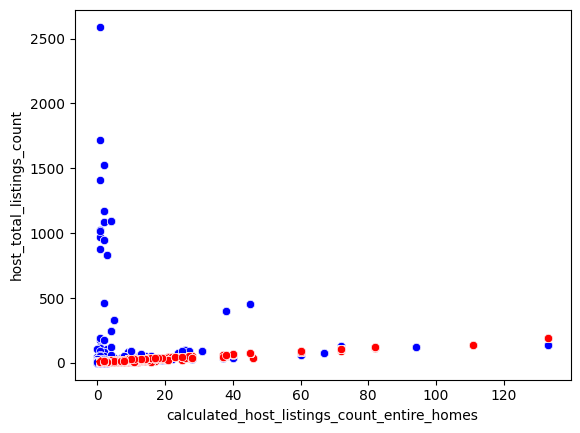

In [145]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='calculated_host_listings_count_entire_homes', y='host_total_listings_count', color="blue", data=df)
sns.scatterplot(x='calculated_host_listings_count', y='Predicciones2', color="red", data=df)
sns.lineplot(x='instant_bookable', y='Predicciones2', color="red", data=df)

In [146]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter


0.1579088309182567

In [147]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.39737744138068115

accommodates

In [148]:
correlaciones = df.corr()
# Seleccionar solo las correlaciones de 'bedrooms'
correlaciones_bedrooms = correlaciones['accommodates'].sort_values(ascending=False)
# Mostrar las 5 variables más correlacionadas con 'bedrooms'
print(correlaciones_bedrooms.head(8))  

accommodates                                   1.000000
bedrooms                                       0.698706
beds                                           0.692253
bathrooms                                      0.471286
calculated_host_listings_count_entire_homes    0.167823
Predicciones2                                  0.163465
calculated_host_listings_count                 0.139126
availability_365                               0.098488
Name: accommodates, dtype: float64


In [149]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['beds', 'bedrooms','bathrooms']]
Var_Dep= df['accommodates']

In [150]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['beds', 'bedrooms', 'bathrooms'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.5214284 , 0.83353164, 0.08222455]),
 'rank_': 3,
 'singular_': array([149.50308505,  64.34359123,  43.88050018]),
 'intercept_': 1.080331238000567}

In [151]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.5890216374549611

In [152]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=df[['beds', 'bedrooms', 'bathrooms']])
y_pred

array([3.03894424, 3.87247588, 3.03894424, ..., 4.1640256 , 7.26827348,
       3.91358816])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Prediccione3', y_pred)
df


<Axes: xlabel='beds', ylabel='accommodates'>

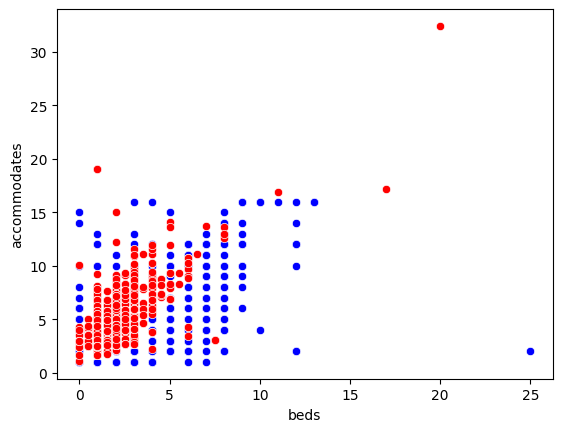

In [156]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='beds', y='accommodates', color="blue", data=df)
sns.scatterplot(x='bathrooms', y='Prediccione3', color="red", data=df)
#sns.lineplot(x='bedrooms', y='Prediccione3', color="red", data=df)

In [157]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.5890216374549611

In [158]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.7674774507794747

bedrooms

In [ ]:
correlaciones = df.corr()
# Seleccionar solo las correlaciones de 'bedrooms'
correlaciones_bedrooms = correlaciones['bedrooms'].sort_values(ascending=False)
# Mostrar las 5 variables más correlacionadas con 'bedrooms'
print(correlaciones_bedrooms.head(6)) 

bedrooms                                       1.000000
Prediccione                                    0.995715
accommodates                                   0.698706
beds                                           0.644184
bathrooms                                      0.601391
calculated_host_listings_count_entire_homes    0.104126
Name: bedrooms, dtype: float64


In [159]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['accommodates', 'beds','bathrooms']]
Var_Dep= df['bedrooms']



In [160]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['accommodates', 'beds', 'bathrooms'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.19777863, 0.14367098, 0.41289548]),
 'rank_': 3,
 'singular_': array([200.44701352,  81.05053404,  53.33875955]),
 'intercept_': -0.022588116438802652}

In [161]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)


0.6087687336126423

In [162]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=df[['accommodates', 'beds', 'bathrooms']])
y_pred

array([1.07320659, 1.46876385, 1.07320659, ..., 2.16900129, 3.71446091,
       2.07076885])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones4', y_pred)
df

<Axes: xlabel='accommodates', ylabel='bedrooms'>

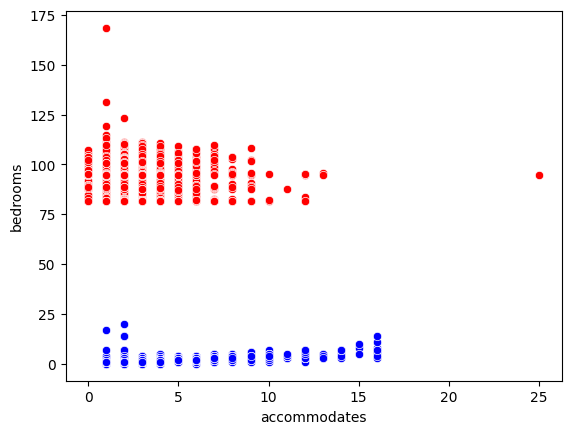

In [166]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='accommodates', y='bedrooms', color="blue", data=df)
sns.scatterplot(x='beds', y='Predicciones', color="red", data=df)
#sns.lineplot(x='bathrooms', y='Predicciones', color="pink", data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.6087687336126423

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.7802363318973567

Price


In [176]:
correlaciones = df.corr()
# Seleccionar solo las correlaciones de 'bedrooms'
correlaciones_bedrooms = correlaciones['price'].sort_values(ascending=False)
# Mostrar las 5 variables más correlacionadas con 'bedrooms'
print(correlaciones_bedrooms.head(6)) 

price                     1.000000
Predicciones1             0.061494
number_of_reviews         0.025741
maximum_nights_avg_ntm    0.022856
host_is_superhost         0.019918
maximum_maximum_nights    0.018225
Name: price, dtype: float64


In [9]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['number_of_reviews', 'maximum_nights_avg_ntm','host_is_superhost']]
Var_Dep= df['price']

In [10]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'maximum_nights_avg_ntm', 'host_is_superhost'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 0.05761238,  0.01458811, 10.0540547 ]),
 'rank_': 3,
 'singular_': array([4.39136665e+04, 1.16595729e+04, 4.22947697e+01]),
 'intercept_': 229.56663633903324}

In [11]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.0010918366942636037

In [12]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=df[['number_of_reviews', 'maximum_nights_avg_ntm', 'host_is_superhost']])
y_pred

array([231.78656314, 230.00427976, 234.89129795, ..., 244.14016224,
       234.89129795, 234.89129795])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones6', y_pred)
df


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='number_of_reviews_ltm', ylabel='price'>

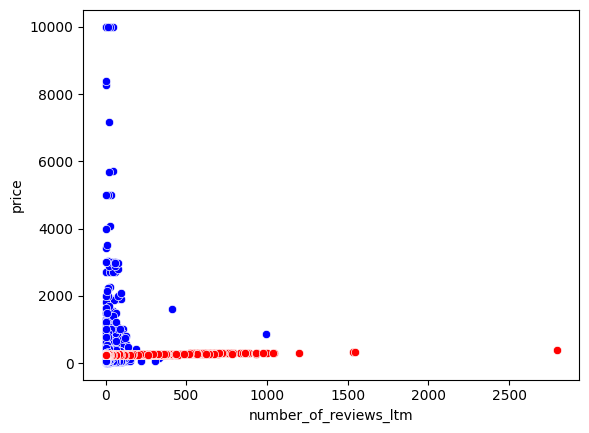

In [17]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='number_of_reviews_ltm', y='price', color="blue", data=df)
sns.scatterplot(x='number_of_reviews', y='Predicciones6', color="red", data=df)
sns.lineplot(x='host_is_superhost', y='Predicciones6', color="red", data=df)

In [15]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter


0.0010918366942636037

In [16]:

#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.03304295226313175

reviews_per_month

In [ ]:
correlaciones = df.corr()
# Seleccionar solo las correlaciones de 'bedrooms'
correlaciones_bedrooms = correlaciones['reviews_per_month'].sort_values(ascending=False)
# Mostrar las 5 variables más correlacionadas con 'bedrooms'
print(correlaciones_bedrooms.head(6))  


reviews_per_month         1.000000
number_of_reviews_ltm     0.789281
Predicciones              0.693645
number_of_reviews         0.568402
number_of_reviews_l30d    0.559387
host_is_superhost         0.224675
Name: reviews_per_month, dtype: float64


In [167]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['number_of_reviews_ltm', 'number_of_reviews','host_is_superhost']]
Var_Dep= df['reviews_per_month']

In [168]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews_ltm', 'number_of_reviews', 'host_is_superhost'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 0.06348613,  0.00015444, -0.15005191]),
 'rank_': 3,
 'singular_': array([12137.75096743,  1700.22547505,    41.92709755]),
 'intercept_': 0.7729418155404675}

In [169]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.6239887229396658

In [170]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=df[['number_of_reviews_ltm', 'number_of_reviews', 'host_is_superhost']])
y_pred

array([0.77850149, 0.77294182, 0.77294182, ..., 0.77294182, 0.77294182,
       0.77294182])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones5', y_pred)
df

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='number_of_reviews_ltm', ylabel='host_acceptance_rate'>

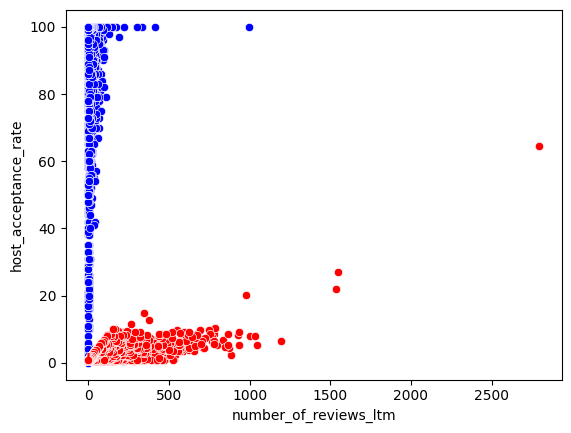

In [172]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='number_of_reviews_ltm', y='host_acceptance_rate', color="blue", data=df)
sns.scatterplot(x='number_of_reviews', y='Predicciones5', color="red", data=df)
sns.lineplot(x='host_is_superhost', y='Predicciones5', color="red", data=df)

In [173]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.6239887229396658

In [174]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.7899295683411691